In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Path to the dataset file
dataset_path = '/content/drive/MyDrive/Credit_Card_Fraud_Detection/credit_card_transactions.csv'

# Check if the file exist
if os.path.exists(dataset_path):
  print("The dataset file is present.")
else:
  print("The dataset file is not present.")

The dataset file is present.


In [3]:
# All imports and utility functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(dataset_path)

# Data Pre-processing

In [5]:
'''
Drop the columns
 1) which are not useful for fraud detection or
 2) have high correlations
'''
df.drop("Unnamed: 0", inplace=True, axis=1)
df.drop("gender", inplace=True, axis=1)
df.drop("first", inplace=True, axis=1)
df.drop("last", inplace=True, axis=1)
df.drop("lat", inplace=True, axis=1) # Almost same as merch_lat
df.drop("long", inplace=True, axis=1) # Almost same as merch_long
df.drop("dob", inplace=True, axis=1)
df.drop("job", inplace=True, axis=1)
df.drop("merch_zipcode", inplace=True, axis=1) # Because we have another zip code also
df.drop("merch_lat", inplace=True, axis=1)
df.drop("merch_long", inplace=True, axis=1)
df.drop("street", inplace=True, axis=1)
df.drop("city_pop", inplace=True, axis=1)
df.drop("trans_date_trans_time", inplace=True, axis=1) # Becuase we have unix_time
df.drop("trans_num", inplace=True, axis=1)
df.drop('city', inplace=True, axis=1)
df.drop('state', inplace=True, axis=1)

print(df.columns)
df.dtypes

Index(['cc_num', 'merchant', 'category', 'amt', 'zip', 'unix_time',
       'is_fraud'],
      dtype='object')


,0
cc_num,int64
merchant,object
category,object
amt,float64
zip,int64
unix_time,int64
is_fraud,int64


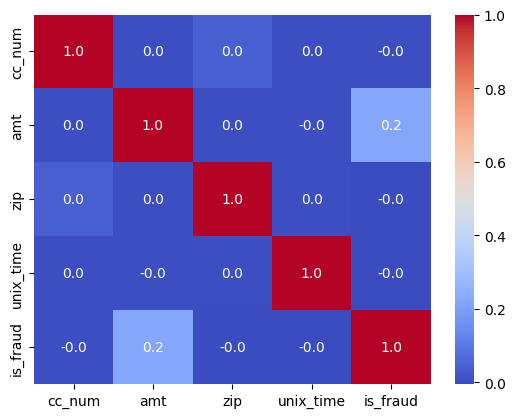

In [6]:
# Check the correlations again among attributes
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [7]:
# Use onehot encoding for the categorical data (merchant, category)
df = pd.get_dummies(df, columns=['merchant', 'category'])

df.head()

,cc_num,amt,zip,unix_time,is_fraud,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,28654,1325376018,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,107.23,99160,1325376044,0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,83252,1325376051,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,59632,1325376076,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,24433,1325376186,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
# See if no categorical attributes are left
df.dtypes

,0
cc_num,int64
amt,float64
zip,int64
unix_time,int64
is_fraud,int64
...,...
category_misc_pos,bool
category_personal_care,bool
category_shopping_net,bool
category_shopping_pos,bool


In [9]:
# Let's fix the class imbalance first using SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

smote = SMOTE()
X,y = smote.fit_resample(X,y)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.4 MB/s eta 0:00:00


In [10]:
# Split the data for train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Number of fraud transactions in the training datset:\n", y_train.value_counts())
print("\nNumber of fraud transactions in the testing dataset:\n", y_test.value_counts())
X.head()

Number of fraud transactions in the training datset:
 is_fraud
0    1031335
1    1031335
Name: count, dtype: int64

Number of fraud transactions in the testing dataset:
 is_fraud
1    257834
0    257834
Name: count, dtype: int64


,cc_num,amt,zip,unix_time,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,28654,1325376018,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,107.23,99160,1325376044,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,83252,1325376051,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,59632,1325376076,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,24433,1325376186,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


We can see that now both the classes are balanced.